# Analysing smells


In [3]:
import pandas as pd
import numpy as np
from plotnine import *

In [4]:
smells_df = pd.read_csv("out/smells.csv")
metrics_df = pd.read_csv("~/Documents/metrics.csv")

In [5]:
smells_df.groupby(["Approach"]).count()

,Target Project,Train Project,Classifier,Classifier Configuration,Evaluator,Value
Approach,,,,,,
BestOfBreed,2450,2450,2450,2450,2450,2450
KNN,2450,2450,2450,2450,2450,2450
Standard,247500,247500,247500,247500,247500,247500
TestSetNormalization,247500,247500,247500,247500,247500,247500
TrainSetNormalization,247500,247500,247500,247500,247500,247500


In [6]:
smells_df.groupby(["Approach", "Target Project", "Evaluator"]).agg("mean")

Value
Approach              Target Project Evaluator                 
BestOfBreed           accumulo       brier_score_loss  0.495875
                                     f1_score          0.386473
                                     precision_score   0.251372
                                     recall_score      0.868172
                                     roc_auc_score     0.648406
...                                                         ...
TrainSetNormalization zeppelin       brier_score_loss  0.440354
                                     f1_score          0.266137
                                     precision_score   0.216904
                                     recall_score      0.432778
                                     roc_auc_score     0.513123

[2480 rows x 1 columns]

## Compare the different approaches
In the first graphs we will consider the average of the Normalization and Standard approaches.
### Violin Plot -> Compare for AUC ROC

In [7]:
df = smells_df.groupby(["Approach", "Target Project", "Evaluator"]).mean().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]
df = df.replace("TestSetNormalization", "TestSet\nNormalization")
df = df.replace("TrainSetNormalization", "TrainSet\nNormalization")

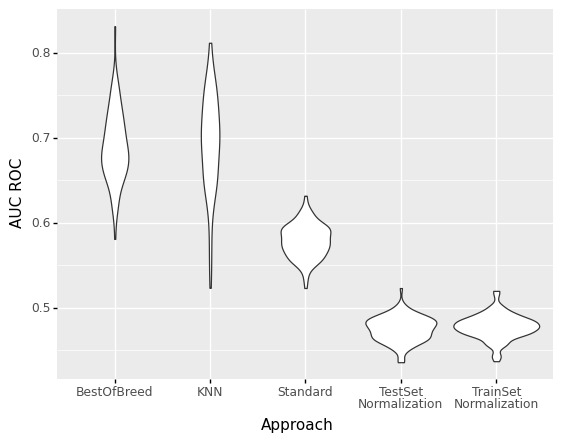

<ggplot: (320622436)>

In [8]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)

### Histogram -> Compare all evaluators

In [9]:
df = smells_df.groupby(["Approach", "Evaluator"]).mean().reset_index()
df = df.replace("TestSetNormalization", "TestSet\nNormalization")
df = df.replace("TrainSetNormalization", "TrainSet\nNormalization")

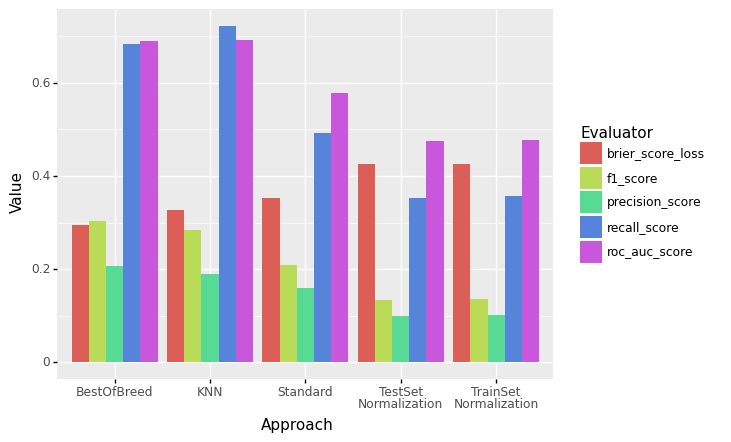

<ggplot: (320644828)>

In [10]:
%matplotlib inline
(ggplot(df, aes(x="Approach", y="Value", fill="Evaluator")) 
 + geom_col(stat='identity', position='dodge'))

Consider the maximum of each metric

In [11]:
df = smells_df.groupby(["Approach", "Target Project", "Train Project", "Evaluator"]).mean().reset_index().groupby(["Approach", "Target Project", "Evaluator"]).max().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]
df = df.replace("TestSetNormalization", "TestSet\nNormalization")
df = df.replace("TrainSetNormalization", "TrainSet\nNormalization")

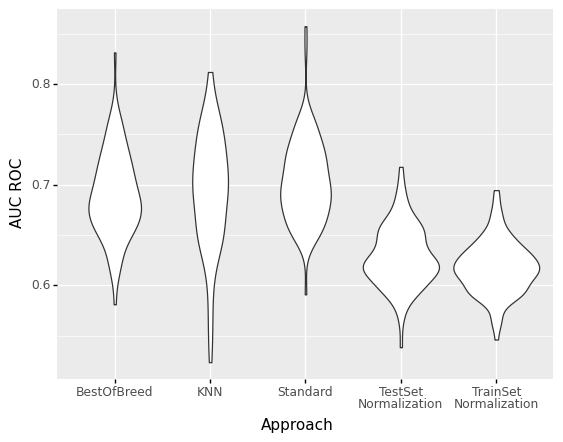

<ggplot: (320726812)>

In [12]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)

## Evaluate the metrics

In [13]:
metrics_df.shape

(141100, 7)

In [14]:
metrics_df.groupby(["Target Project", "Approach"]).count()

,,Train Project,Classifier,Classifier Configuration,Evaluator,Value
Target Project,Approach,,,,,
accumulo,Standard,2475,2475,2475,2475,2475
activemq,Standard,2475,2475,2475,2475,2475
avro,Standard,2475,2475,2475,2475,2475
calcite,Standard,2475,2475,2475,2475,2475
camel,Standard,2475,2475,2475,2475,2475
cassandra,Standard,2475,2475,2475,2475,2475
cayenne,Standard,2475,2475,2475,2475,2475
clerezza,Standard,2475,2475,2475,2475,2475
cocoon,Standard,2475,2475,2475,2475,2475


### Quick Summary

In [15]:
approaches = set(metrics_df['Approach'])
ppa = {approach: len(metrics_df.loc[metrics_df['Approach'] == approach].groupby(['Target Project'])) for approach in approaches}

print(f"number of projects: {len(metrics_df.groupby(['Target Project']).count())}")
print(f"approaches: {approaches}")
print(f"projects per approach: {ppa}")

number of projects: 45
approaches: {'Standard', 'TestSetNormalization', 'TrainSetNormalization', 'BestOfBreed'}
projects per approach: {'Standard': 45, 'TestSetNormalization': 6, 'TrainSetNormalization': 6, 'BestOfBreed': 1}


In [16]:
m_df = metrics_df.copy()
s_df = smells_df.copy()

In [17]:
m_col = list(m_df.columns)
m_col[-1] = "Metrics Value"
m_df.columns = m_col

s_col = list(s_df.columns)
s_col[-1] = "Smells Value"
s_df.columns = s_col

In [18]:
df = pd.merge(s_df, m_df, how='inner', left_on=list(m_df.columns[:-1]), right_on=list(m_df.columns[:-1]))

In [19]:
df

,Target Project,Approach,Train Project,Classifier,Classifier Configuration,Evaluator,Smells Value,Metrics Value
0,commons-cli,Standard,accumulo,RandomForestClassifier,{},roc_auc_score,0.807217,0.490329
1,commons-cli,Standard,activemq,RandomForestClassifier,{},roc_auc_score,0.624406,0.592276
2,commons-cli,Standard,activemq-artemis,RandomForestClassifier,{},roc_auc_score,0.670465,0.591216
3,commons-cli,Standard,airavata,RandomForestClassifier,{},roc_auc_score,0.582858,0.537692
4,commons-cli,Standard,archiva,RandomForestClassifier,{},roc_auc_score,0.693495,0.500000
...,...,...,...,...,...,...,...,...
141070,jclouds,Standard,tomee,GaussianNB,{},brier_score_loss,0.108515,0.604045
141071,jclouds,Standard,uima-ruta,GaussianNB,{},brier_score_loss,0.764437,0.678882
141072,jclouds,Standard,wicket,GaussianNB,{},brier_score_loss,0.731902,0.702933
141073,jclouds,Standard,xmlgraphics-fop,GaussianNB,{},brier_score_loss,0.494414,0.657802


In [20]:
df_list = list()
columns = list(df.columns)[:-2] + ["Dataset", "Value"] 
for row in df.itertuples():
    row1 = list(row[1:7])
    row2 = list(row[1:7])
    row1.append("Smells")
    row1.append(row[7])
    row2.append("Metrics")
    row2.append(row[8])
    df_list.append(tuple(row1))
    df_list.append(tuple(row2))

df = pd.DataFrame(df_list, columns=columns)

In [21]:
df

,Target Project,Approach,Train Project,Classifier,Classifier Configuration,Evaluator,Dataset,Value
0,commons-cli,Standard,accumulo,RandomForestClassifier,{},roc_auc_score,Smells,0.807217
1,commons-cli,Standard,accumulo,RandomForestClassifier,{},roc_auc_score,Metrics,0.490329
2,commons-cli,Standard,activemq,RandomForestClassifier,{},roc_auc_score,Smells,0.624406
3,commons-cli,Standard,activemq,RandomForestClassifier,{},roc_auc_score,Metrics,0.592276
4,commons-cli,Standard,activemq-artemis,RandomForestClassifier,{},roc_auc_score,Smells,0.670465
...,...,...,...,...,...,...,...,...
282145,jclouds,Standard,wicket,GaussianNB,{},brier_score_loss,Metrics,0.702933
282146,jclouds,Standard,xmlgraphics-fop,GaussianNB,{},brier_score_loss,Smells,0.494414
282147,jclouds,Standard,xmlgraphics-fop,GaussianNB,{},brier_score_loss,Metrics,0.657802
282148,jclouds,Standard,zeppelin,GaussianNB,{},brier_score_loss,Smells,0.765079


In [22]:
df = df.groupby(["Approach", "Target Project", "Evaluator", "Dataset"]).mean().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]

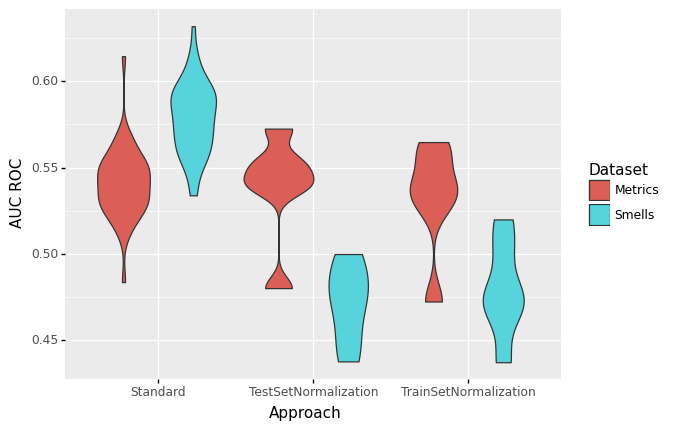

<ggplot: (320721363)>

In [23]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value", fill="Dataset"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)

In [24]:
df = df.groupby(["Approach", "Target Project", "Train Project", "Evaluator", "Dataset"]).mean().reset_index().groupby(["Approach", "Target Project", "Evaluator", "Dataset"]).max().reset_index()
df = df.loc[df['Evaluator'] == "roc_auc_score"]

KeyError: 'Train Project'

In [ ]:
%matplotlib inline
(ggplot(df, 
        aes(x="factor(Approach)", y="Value", fill="Dataset"))
 + geom_violin()
 + xlab("Approach")
 + ylab("AUC ROC")
)